# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
path = 'gdrive/My Drive/colab/dlcv_marathon/'
os.chdir(path)

In [0]:
import cv2
import numpy as np

img_path = './data/lena.png'

img = cv2.imread(img_path, cv2.IMREAD_COLOR)

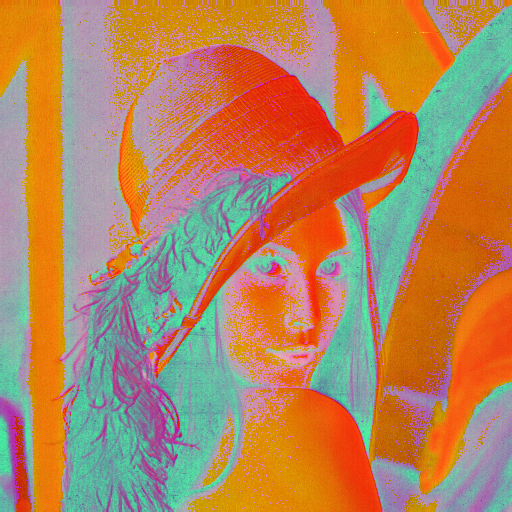

In [4]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(img_hsv)

In [5]:
img_hsv.shape

(512, 512, 3)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

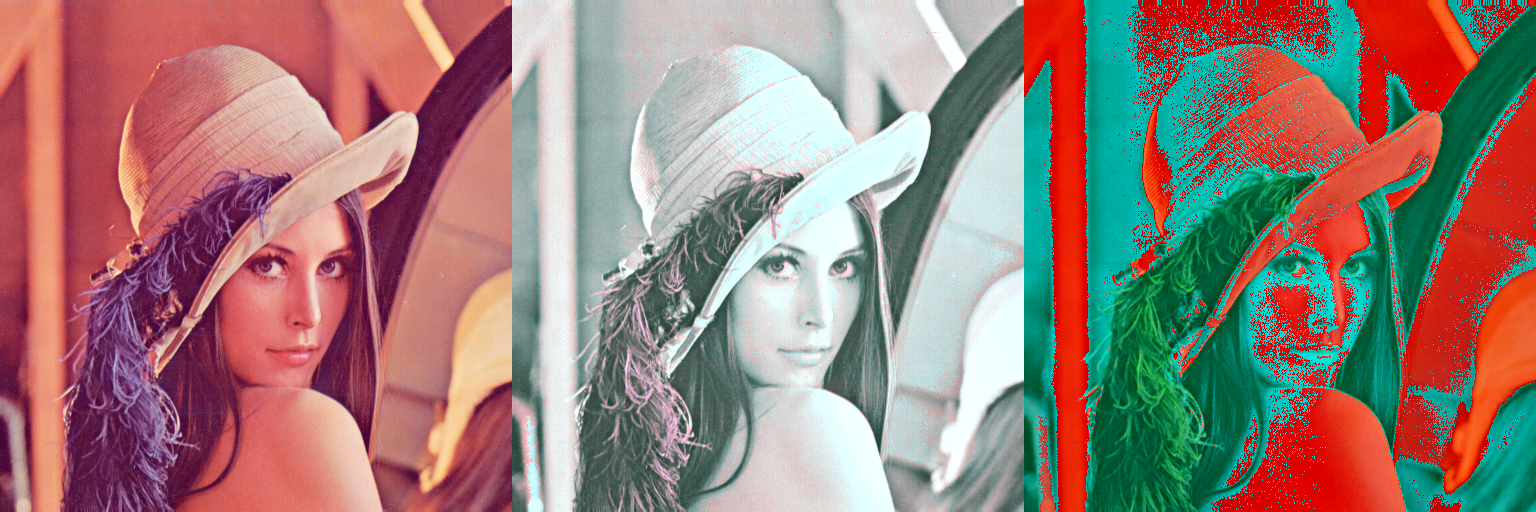

In [6]:
img_hsv_down = img_hsv.astype('float32')
img_hsv_up = img_hsv.astype('float32')

change_percentage = 0.5

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down[:,:,1] = img_hsv_down[:,:,1]/255 - change_percentage

# 在 HSV color space 增加飽和度
img_hsv_up[:,:,1] = img_hsv_up[:,:,1]/255 + change_percentage

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))
cv2_imshow(img_hsv_change)

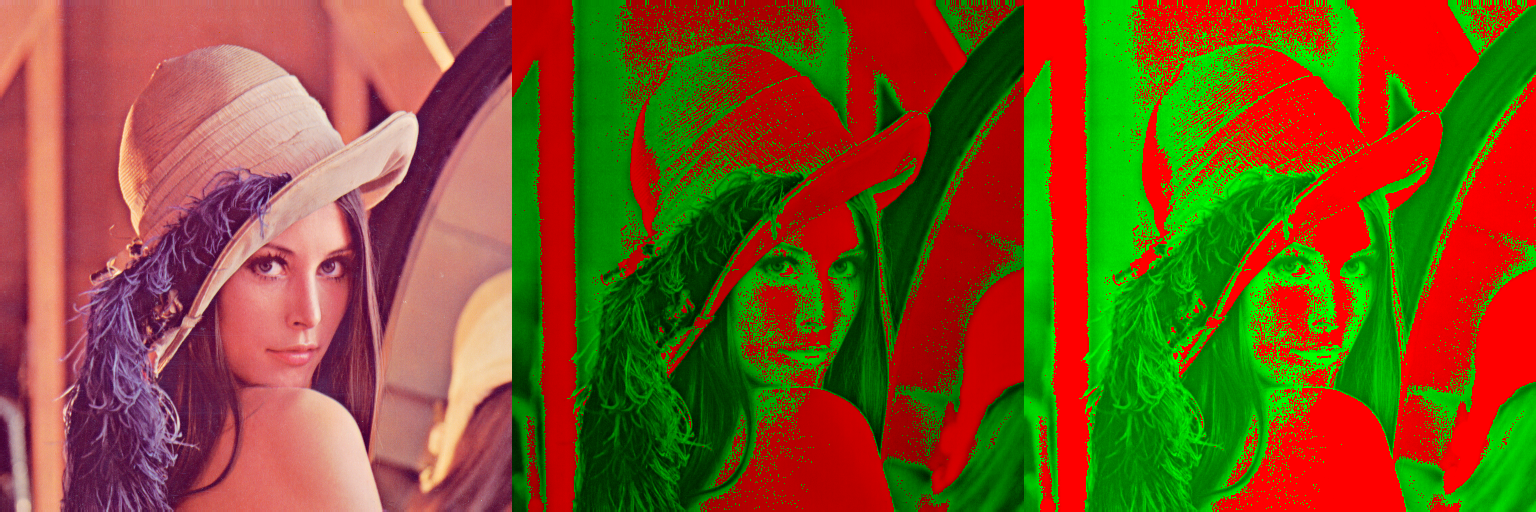

In [7]:
img_hsv_down = img_hsv.astype('float32')
img_hsv_up = img_hsv.astype('float32')

change_percentage = 0.15

img_hsv_down[:,:,2] = (img_hsv_up[:,:,2]/255 - change_percentage) * 255

img_hsv_up[:,:,2] = (img_hsv_up[:,:,2]/255 + change_percentage) * 255

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))
cv2_imshow(img_hsv_change)

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

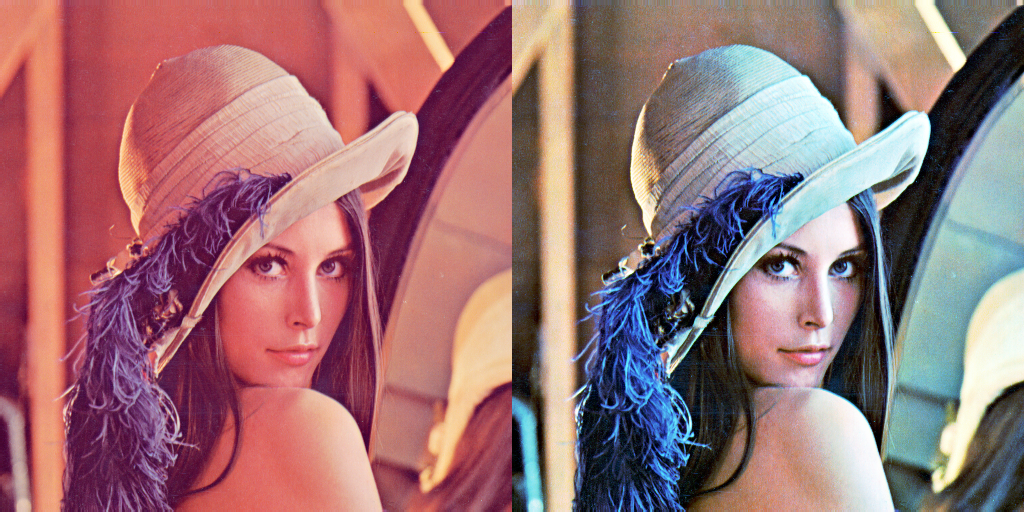

In [8]:
# case 1
# 每個 channel 個別做直方圖均衡
equalHist_by_channel = np.zeros((512,512,3))
equalHist_by_channel[:,:,0] = cv2.equalizeHist(img[:,:,0])
equalHist_by_channel[:,:,1] = cv2.equalizeHist(img[:,:,1])
equalHist_by_channel[:,:,2] = cv2.equalizeHist(img[:,:,2])

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = equalHist_by_channel
cv2_imshow(np.hstack((img,img_bgr_equal)))

In [9]:
# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_hsv_equal_h = np.dstack((cv2.equalizeHist(img_hsv_equal[:,:,0]),img_hsv_equal[:,:,1],img_hsv_equal[:,:,2]))
img_hsv_equal_s = np.dstack((img_hsv_equal[:,:,0],cv2.equalizeHist(img_hsv_equal[:,:,1]),img_hsv_equal[:,:,2]))
img_hsv_equal_v = np.dstack((img_hsv_equal[:,:,0],img_hsv_equal[:,:,1],cv2.equalizeHist(img_hsv_equal[:,:,2])))
cv2_imshow(np.hstack((cv2.cvtColor(img_hsv_equal_h, cv2.COLOR_HSV2BGR),cv2.cvtColor(img_hsv_equal_s, cv2.COLOR_HSV2BGR),cv2.cvtColor(img_hsv_equal_v, cv2.COLOR_HSV2BGR))))

Output hidden; open in https://colab.research.google.com to view.

In [10]:
img_hsv_equal = cv2.cvtColor(img_hsv_equal_h, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))
cv2_imshow(img_bgr_equalHist)

Output hidden; open in https://colab.research.google.com to view.

## 調整對比 / 明亮

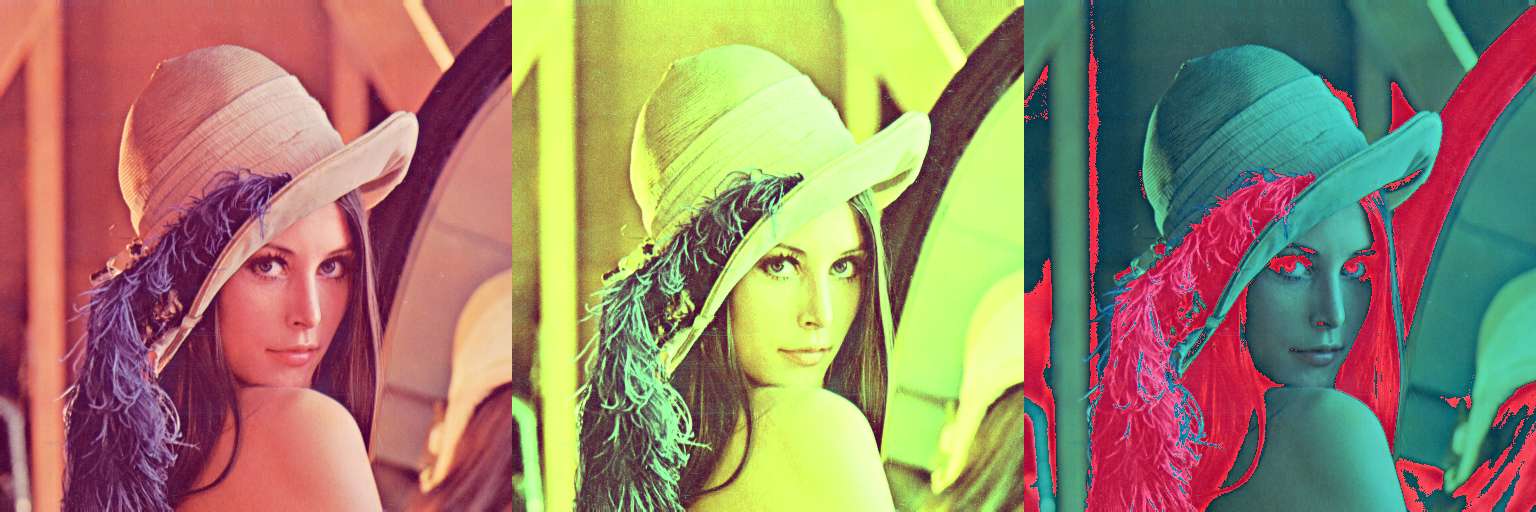

In [11]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
alpha = 2.5
beta = 100
add_contrast = np.dstack((img[:,:,0],img[:,:,1] * alpha,img[:,:,2]))
add_lighness = np.dstack((img[:,:,0],img[:,:,1],img[:,:,2] + beta))

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
cv2_imshow(img_contrast_light)